In [41]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [14]:
# sep=; pga default är komma, ger korrekt format nedan
data = pd.read_csv('student-mat.csv', sep=';')

In [15]:
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
5       GP   M   16       U     LE3       T     4     3  services     other   
6       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
8       GP   M   15       U     LE3       A     3     2  services     other   
9       GP   M   15       U     GT3       T     3     4     other     other   
10      GP   F   15       U     GT3       T     4     4   teacher    health   
11      GP   F   15       U     GT3       T     2     1  services     other   
12      GP   M   15       U     LE3       T     4     4    health  services   
13      GP   M   15       U     GT3       T     4     3   teacher     other   
14      GP   M   15       U     GT3       A     2     2     other     other   
15      GP   F   16       U     GT3       T     4     4    health     other   
16      GP   F   16       U     GT3       T     4     4  services  services   
17      GP   F   16       U     GT3       T     3     3     other     other   
18      GP   M   17       U     GT3       T     3     2  services  services   
19      GP   M   16       U     LE3       T     4     3    health     other   
20      GP   M   15       U     GT3       T     4     3   teacher     other   
21      GP   M   15       U     GT3       T     4     4    health    health   
22      GP   M   16       U     LE3       T     4     2   teacher     other   
23      GP   M   16       U     LE3       T     2     2     other     other   
24      GP   F   15       R     GT3       T     2     4  services    health   
25      GP   F   16       U     GT3       T     2     2  services  services   
26      GP   M   15       U     GT3       T     2     2     other     other   
27      GP   M   15       U     GT3       T     4     2    health  services   
28      GP   M   16       U     LE3       A     3     4  services     other   
29      GP   M   16       U     GT3       T     4     4   teacher   teacher   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
365     MS   M   18       R     GT3       T     1     3   at_home     other   
366     MS   M   18       U     LE3       T     4     4   teacher  services   
367     MS   F   17       R     GT3       T     1     1     other  services   
368     MS   F   18       U     GT3       T     2     3   at_home  services   
369     MS   F   18       R     GT3       T     4     4     other   teacher   
370     MS   F   19       U     LE3       T     3     2  services  services   
371     MS   M   18       R     LE3       T     1     2   at_home  services   
372     MS   F   17       U     GT3       T     2     2     other   at_home   
373     MS   F   17       R     GT3       T     1     2     other     other   
374     MS   F   18       R     LE3       T     4     4     other     other   
375     MS   F   18       R     GT3       T     1     1     other     other   
376     MS   F   20       U     GT3       T     4     2    health     other   
377     MS   F   18       R     LE3       T     4     4   teacher  services   
378     MS   F   18       U     GT3       T     3     3     other     other   
379     MS   F   17       R     GT3       T     3     1   at_home     other   
380     MS   M   18       U     GT3       T     4     4   teacher   teacher   
381     MS   M   18       R     GT3       T     2     1     other     other   
382     MS   M   17       U     GT3       T     2     3     other  services   
383     MS   M   19       R     GT3       T     1     

In [17]:
# väljer ut de kolumner som ska analyseras. OBS välj kolumner med integervärden / omvandla till ints
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]

data

G1  G2  G3  studytime  failures  absences
0     5   6   6          2         0         6
1     5   5   6          2         0         4
2     7   8  10          2         3        10
3    15  14  15          3         0         2
4     6  10  10          2         0         4
5    15  15  15          2         0        10
6    12  12  11          2         0         0
7     6   5   6          2         0         6
8    16  18  19          2         0         0
9    14  15  15          2         0         0
10   10   8   9          2         0         0
11   10  12  12          3         0         4
12   14  14  14          1         0         2
13   10  10  11          2         0         2
14   14  16  16          3         0         0
15   14  14  14          1         0         4
16   13  14  14          3         0         6
17    8  10  10          2         0         4
18    6   5   5          1         3        16
19    8  10  10          1         0         4
20   13  14  15          2         0         0
21   12  15  15          1         0         0
22   15  15  16          2         0         2
23   13  13  12          2         0         0
24   10   9   8          3         0         2
25    6   9   8          1         2        14
26   12  12  11          1         0         2
27   15  16  15          1         0         4
28   11  11  11          2         0         4
29   10  12  11          2         0        16
..   ..  ..  ..        ...       ...       ...
365  10  10  10          2         0         4
366  13  13  13          3         0         0
367   7   6   0          1         1         0
368  11  10  10          1         0         0
369  14  12  11          2         0        10
370   7   7   9          2         2         4
371  14  12  12          1         0         3
372  13  11  11          3         0         8
373   6   5   5          1         0        14
374  19  18  19          3         0         0
375   8   8  10          3         0         2
376  15  14  15          3         2         4
377   8   9  10          2         0         4
378  15  15  15          2         0         0
379  10  10  10          2         0        17
380  15  14  14          2         0         4
381   7   6   7          1         0         5
382  11  11  10          2         0         2
383   6   5   0          1         1         0
384   6   5   5          1         1        14
385  10   9  10          3         0         2
386   6   5   6          1         0         7
387   7   5   0          3         1         0
388   7   9   8          2         0         0
389   6   5   0          2         1         0
390   9   9   9          2         2        11
391  14  16  16          1         0         3
392  10   8   7          1         3         3
393  11  12  10          1         0         0
394   8   9   9          1         0         5

[395 rows x 6 columns]

In [36]:
# Ange vilken kolumn det är som ska beräknas fram
predict = "G3"

# x = alla attribut förutom det som ska predictas, y = det som predictas 
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

# arrayerna splittas till träningsdata och testdata, 90% träning 10% test
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [37]:
# finds best fit line
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
# test the accuracy
acc = linear.score(x_test, y_test)
acc

0.8426459698844395

In [43]:
# saves the trained model
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [44]:
# loads in the model from file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [51]:
# finds the best model and saves it

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

best = 0

for _ in range(10000):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)
    
    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train)
    
    acc = linear.score(x_test, y_test)
    
    if acc > best:
        print("New best!!! ", acc)
        best = acc
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

New best!!!  0.8264393870853373
New best!!!  0.9063377326874714
New best!!!  0.9238462456843887
New best!!!  0.9501174653726812
New best!!!  0.9537487260426968
New best!!!  0.9571723815722594
New best!!!  0.961395357391104
New best!!!  0.9704465737621083


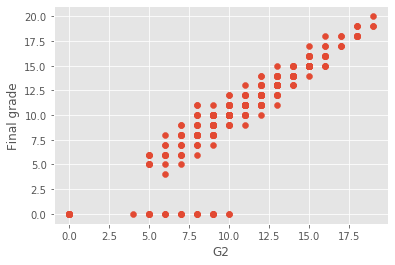

In [53]:
# shows in graph

p = "G2"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show()